# NECESSARY installations

# Import the necessary libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
#read the csv file by using pandas
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head(5)

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               25000 non-null  object
 1   sentiment          25000 non-null  object
 2   sentiment_encoded  25000 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 488.4+ KB


In [21]:
train_df.describe()

,text,sentiment
count,25000,25000
unique,24904,2
top,How has this piece of crap stayed on TV this l...,neg
freq,3,12500


In [8]:
# Data Preprocessing
le = LabelEncoder()
train_df['sentiment_encoded'] = le.fit_transform(train_df['sentiment'])
X = train_df['text']
y = to_categorical(train_df['sentiment_encoded'])

In [9]:
print(X)
print(y)

0        Now, I won't deny that when I purchased this o...
1        The saddest thing about this "tribute" is that...
2        Last night I decided to watch the prequel or s...
3        I have to admit that i liked the first half of...
4        I was not impressed about this film especially...
                               ...                        
24995    This film is fun, if your a person who likes a...
24996    After seeing this film I feel like I know just...
24997    first this deserves about 5 stars due to actin...
24998    If you like films that ramble with little plot...
24999    As interesting as a sheet of cardboard, this d...
Name: text, Length: 25000, dtype: object
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
def plot_model_learning(history, title):
    fig, ax = plt.subplots(2, 1, figsize=(20, 8))
    df = pd.DataFrame(history.history)
    df[['accuracy', 'val_accuracy']].plot(ax=ax[0])
    df[['loss', 'val_loss']].plot(ax=ax[1])
    ax[0].set_title('Model Accuracy', fontsize=12)
    ax[1].set_title('Model Loss', fontsize=12)
    fig.suptitle(f'{title}: Model Metrics', fontsize=18)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 200, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 1161002 (4.43 MB)
Trainable params: 1161002 (4.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.

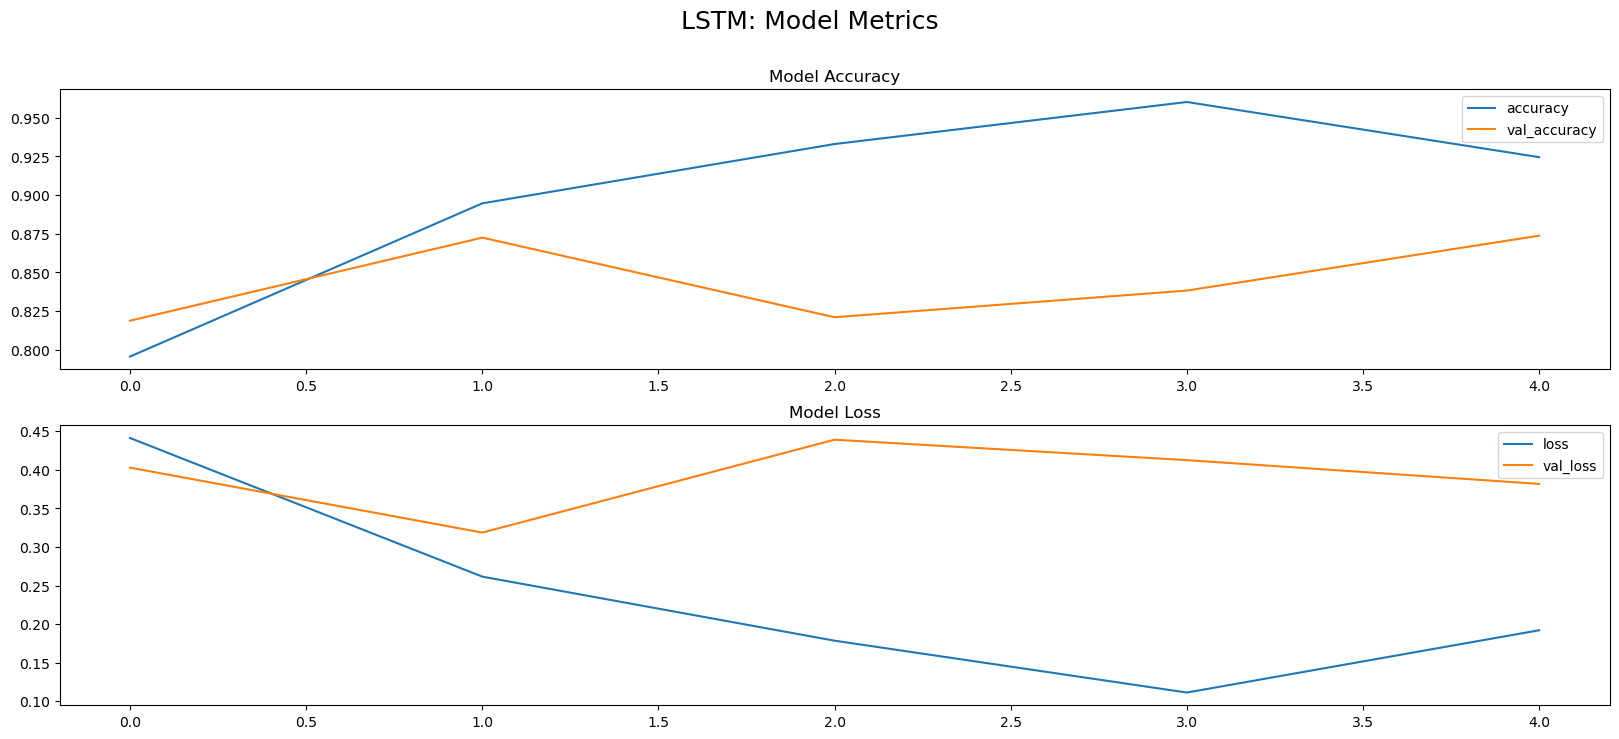

In [11]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
max_words = 10000  # Limit the vocabulary size
max_sequence_length = 200  # Limit the sequence length
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Build the LSTM Model
embedding_dim = 100  # Dimensionality of word embeddings
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))  # 2 output classes (binary classification)

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, show_shapes=True)

# Early Stopping Callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the Model
epochs = 10
batch_size = 16
history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

plot_model_learning(history, 'LSTM')

# Evaluation

In [12]:
# Tokenization and Padding for the test data
X_test_data = test_df['text']
X_test_seq = tokenizer.texts_to_sequences(X_test_data)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Make Predictions
predictions = model.predict(X_test_pad)

# Convert the model's predictions back to sentiment labels
predicted_sentiments = [le.classes_[np.argmax(prediction)] for prediction in predictions]

# Add the predicted sentiments to the test DataFrame
test_df['predicted_sentiment'] = predicted_sentiments

# Display or save the results
print(test_df[['text', 'predicted_sentiment']])

test_df.to_csv("predicted.csv")


782/782 [==============================] - 82s 102ms/step
                                                    text predicted_sentiment
0      My daughter liked it but I was aghast, that a ...                 neg
1      I... No words. No words can describe this. I w...                 neg
2      this film is basically a poor take on the old ...                 neg
3      This is a terrible movie, and I'm not even sur...                 neg
4      First of all this movie is a piece of reality ...                 pos
...                                                  ...                 ...
24995  For one thing, he produced this movie. It has ...                 pos
24996  The title comes from an alteration an adolesce...                 pos
24997  Christopher Nolan's first film is a 'no budget...                 pos
24998  The story is shortly about the faith-lacking b...                 neg
24999  I found parts of this movie rather slow, espec...                 neg

[25000 rows x 2 c

Accuracy: 0.8619
Precision: 0.8632
Recall: 0.8619
F1-score: 0.8618
Confusion Matrix:
[[10396  2104]
 [ 1349 11151]]


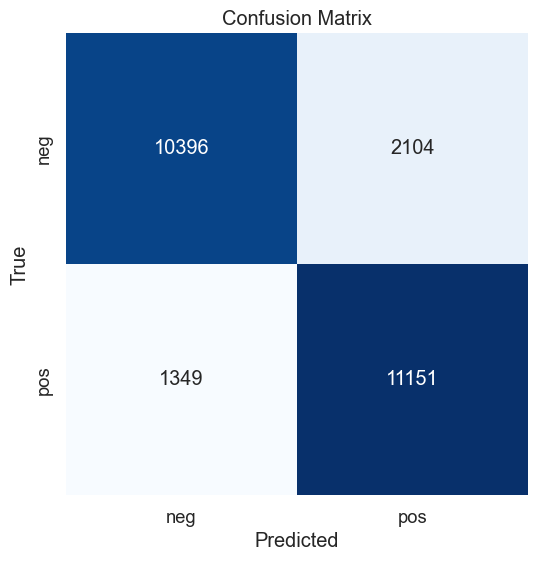

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have made predictions and added them to the 'test_df' DataFrame as 'predicted_sentiment'

# True labels from the test DataFrame
true_labels = test_df['sentiment']

# Predicted labels
predicted_labels = test_df['predicted_sentiment']

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Generate a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(confusion)

# Plot the confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, classes):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have a list of class labels
classes = ['neg', 'pos']  # List of class labels

# Call the function to plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, classes)